# Proyek Analisis Data: Bike-sharing Dataset
- **Nama:** Amanda Nurul Izzah
- **Email:** amanda.nurul11@ui.ac.id (Dicoding), m010d4kx1985@bangkit.academy (Bangkit)
- **ID Dicoding:** amrul4305

## Menentukan Pertanyaan Bisnis

- Bagaimana perubahan musim memengaruhi volume penyewaan sepeda?
- Kapan waktu puncak untuk penyewaan sepeda pada hari kerja dibandingkan dengan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
df_day = pd.read_csv('./data/day.csv')
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
df_hour = pd.read_csv("./data/hour.csv")
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

#### df_day

In [9]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# mengecek missing values
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# mengecek duplicated values
df_day.duplicated().sum()

0

In [8]:
# mengecek invalid/inconsistent/inaccurate values secara sekilas
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [39]:
# mengecek outlier

def detect_outliers(df):
    outliers_dict = {}
    
    for column in df.columns:
        if df[column].dtype == 'object':
            continue

        q25, q75 = np.percentile(df[column], 25), np.percentile(df[column], 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        minimum, maximum = q25 - cut_off, q75 + cut_off
        
        outliers = [x for x in df[column] if x < minimum or x > maximum]
        outliers_dict[column] = outliers
        
    return outliers_dict

In [68]:
df_day_outliers = detect_outliers(df_day)
print('No outlier') if (df_day_outliers == 0) else print('Outlier detected')

Outlier detected


`df_day` memiliki outlier.

#### df_hour

In [41]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


731 * 24 = 17544 > 17379

Jika diperhatikan, terdapat 731 row data hari pada `df_day` sedangkan hanya ada 17379 row data pada `df_hour`. Artinya, tidak semua hari memiliki data untuk semua jamnya. Di antara lain, ada dua kemungkinan: <br>
(1) Datanya hilang <br>
(2) Sistem hanya melaporkan waktu-waktu yang memilki pengguna

Untuk sekarang kita tahan dulu informasi ini.

In [42]:
# mengecek missing values
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [43]:
# mengecek duplicated values
df_hour.duplicated().sum()

0

In [44]:
# mengecek invalid/inconsistent/inaccurate values secara sekilas
df_hour.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [67]:
df_hour_outliers = detect_outliers(df_hour)
print('No outlier') if (df_hour_outliers == 0) else print('Outlier detected')

Outlier detected


### Cleaning Data

Selain kolom-kolom outlier, tidak ada masalah yang perlu ditanggani pada kedua dataframe kita. 

In [51]:
def drop_outliers(df, outliers_dict):
    rows_to_drop = []
    for column, outlier_values in outliers_dict.items():
        outlier_indices = df[df[column].isin(outlier_values)].index
        rows_to_drop.extend(outlier_indices)

    rows_to_drop = set(rows_to_drop)
    df_cleaned = df.drop(rows_to_drop)
    
    return df_cleaned

In [54]:
df_day_no_out = drop_outliers(df_day, df_day_outliers)
df_day_no_out

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [55]:
df_hour_no_out = drop_outliers(df_hour, df_hour_outliers)
df_hour_no_out

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Exploratory Data Analysis (EDA)

### Explore Central Tendency and Symmetry

Menggunakan histogram, kita dapat melihat distribusi data sekaligus mendapat gambaran tentang simetri data. Kemudian, untuk melihat central tendency dan statistik deskriptif lainnya kita bisa menggunakan `.describe()`.

Untuk bagian histogram juga memuat outlier sebagai visualisasi sebelum maupun sesudah pembuangan outlier (versi yang sesudah tinggal abaikan saja _extreme tail_ dari masing-masing histogram)

In [69]:
def visualize_histograms(df):
    numeric_columns = df.select_dtypes(include=['number']).columns

    num_plots = len(numeric_columns)
    num_rows = num_plots // 3 + (1 if num_plots % 3 > 0 else 0)
    num_cols = min(num_plots, 3)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

    for i, column in enumerate(numeric_columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]
        df[column].hist(ax=ax, bins=20)
        ax.set_title(column)
        plt.tight_layout()

    # hide empty
    if num_plots < num_rows * num_cols:
        for i in range(num_plots, num_rows*num_cols):
            row = i // num_cols
            col = i % num_cols
            fig.delaxes(axes[row, col])

    plt.show()


Pertama untuk data harian:

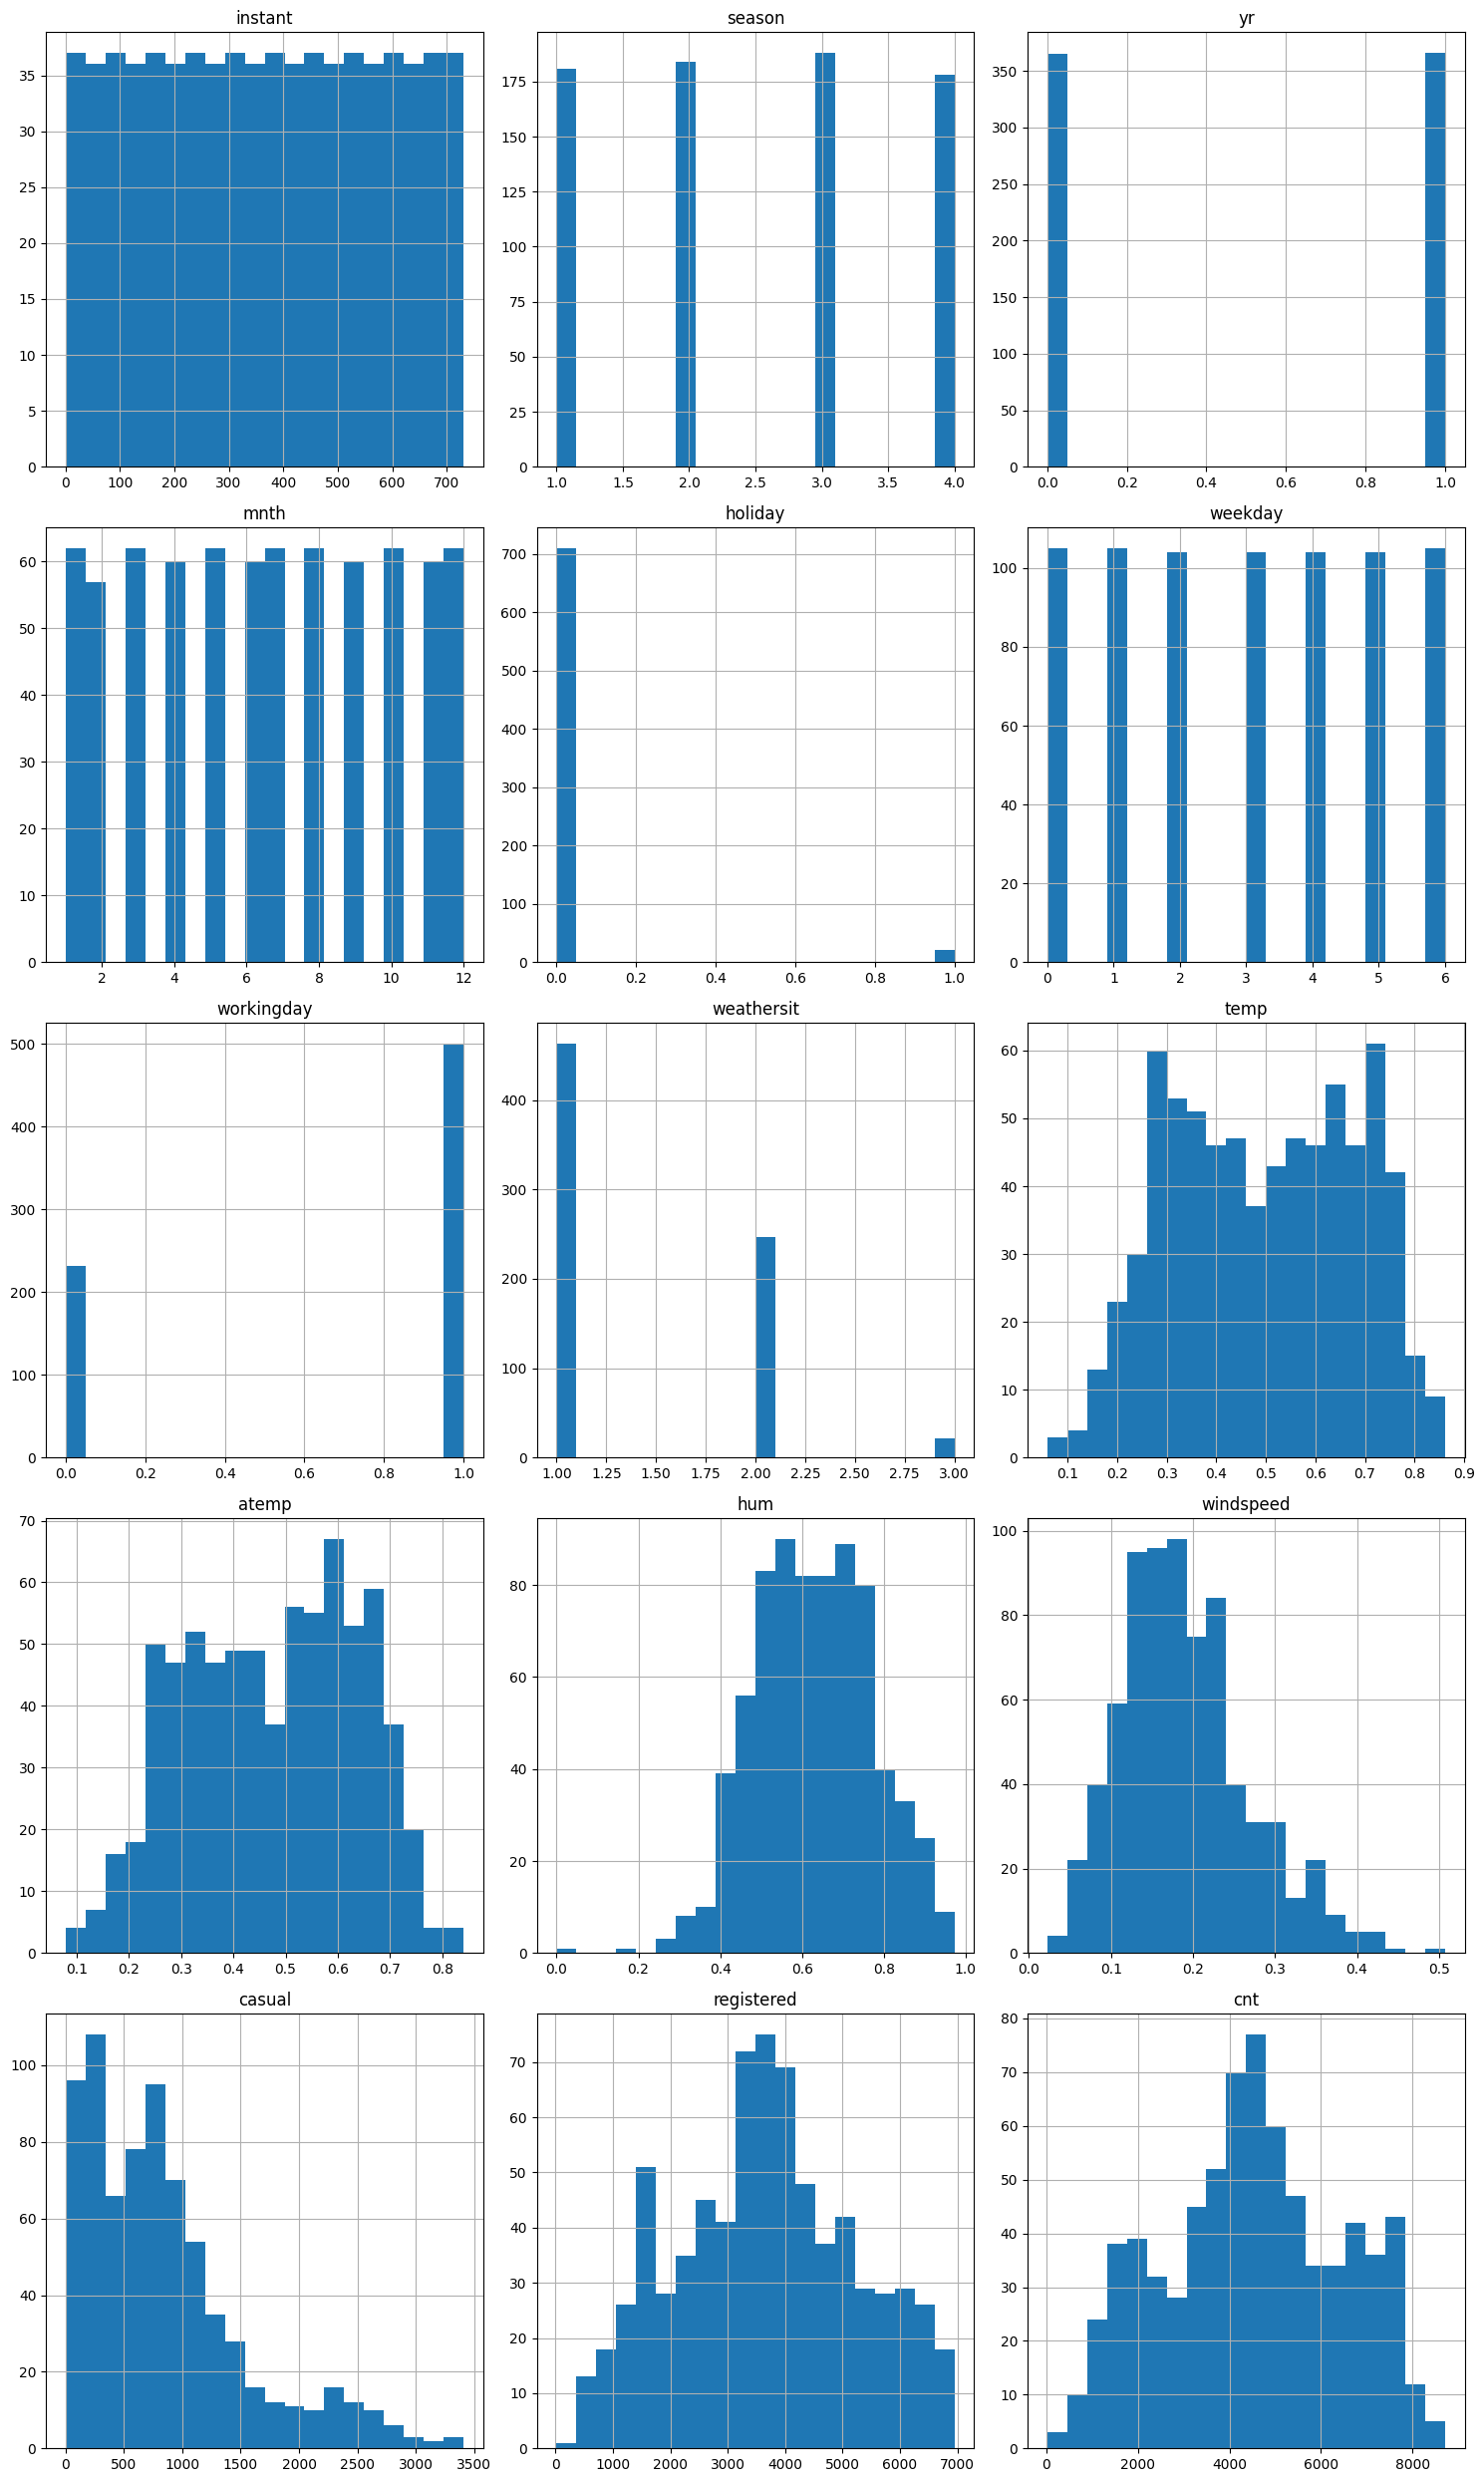

In [70]:
visualize_histograms(df_day)

In [75]:
# dengan outlier
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [76]:
# tanpa outlier 
df_day_no_out.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,655.000000,655,655.000000,655.000000,655.000000,655.0,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.000000,655.00000,655.000000,655.000000
unique,NaN,655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,357.366412,NaN,2.506870,0.474809,6.545038,0.0,2.993893,0.748092,1.407634,0.491363,0.470946,0.633358,0.186224,737.60000,3660.157252,4397.757252
std,211.948901,NaN,1.118184,0.499747,3.482684,0.0,1.929164,0.434441,0.550454,0.185020,0.164436,0.140990,0.072228,522.93126,1570.067857,1854.957213
min,1.000000,NaN,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.059130,0.079070,0.275833,0.022392,2.00000,20.000000,22.000000
25%,174.500000,NaN,1.500000,0.000000,3.500000,0.0,1.000000,0.000000,1.000000,0.330833,0.329850,0.524900,0.133721,303.50000,2506.500000,3129.000000
50%,348.000000,NaN,3.000000,0.000000,7.000000,0.0,3.000000,1.000000,1.000000,0.485833,0.474117,0.630833,0.176625,684.00000,3643.000000,4456.000000
75%,544.500000,NaN,3.000000,1.000000,10.000000,0.0,5.000000,1.000000,2.000000,0.653750,0.607960,0.734583,0.230723,1028.00000,4737.000000,5651.000000


Lalu untuk data per jam:

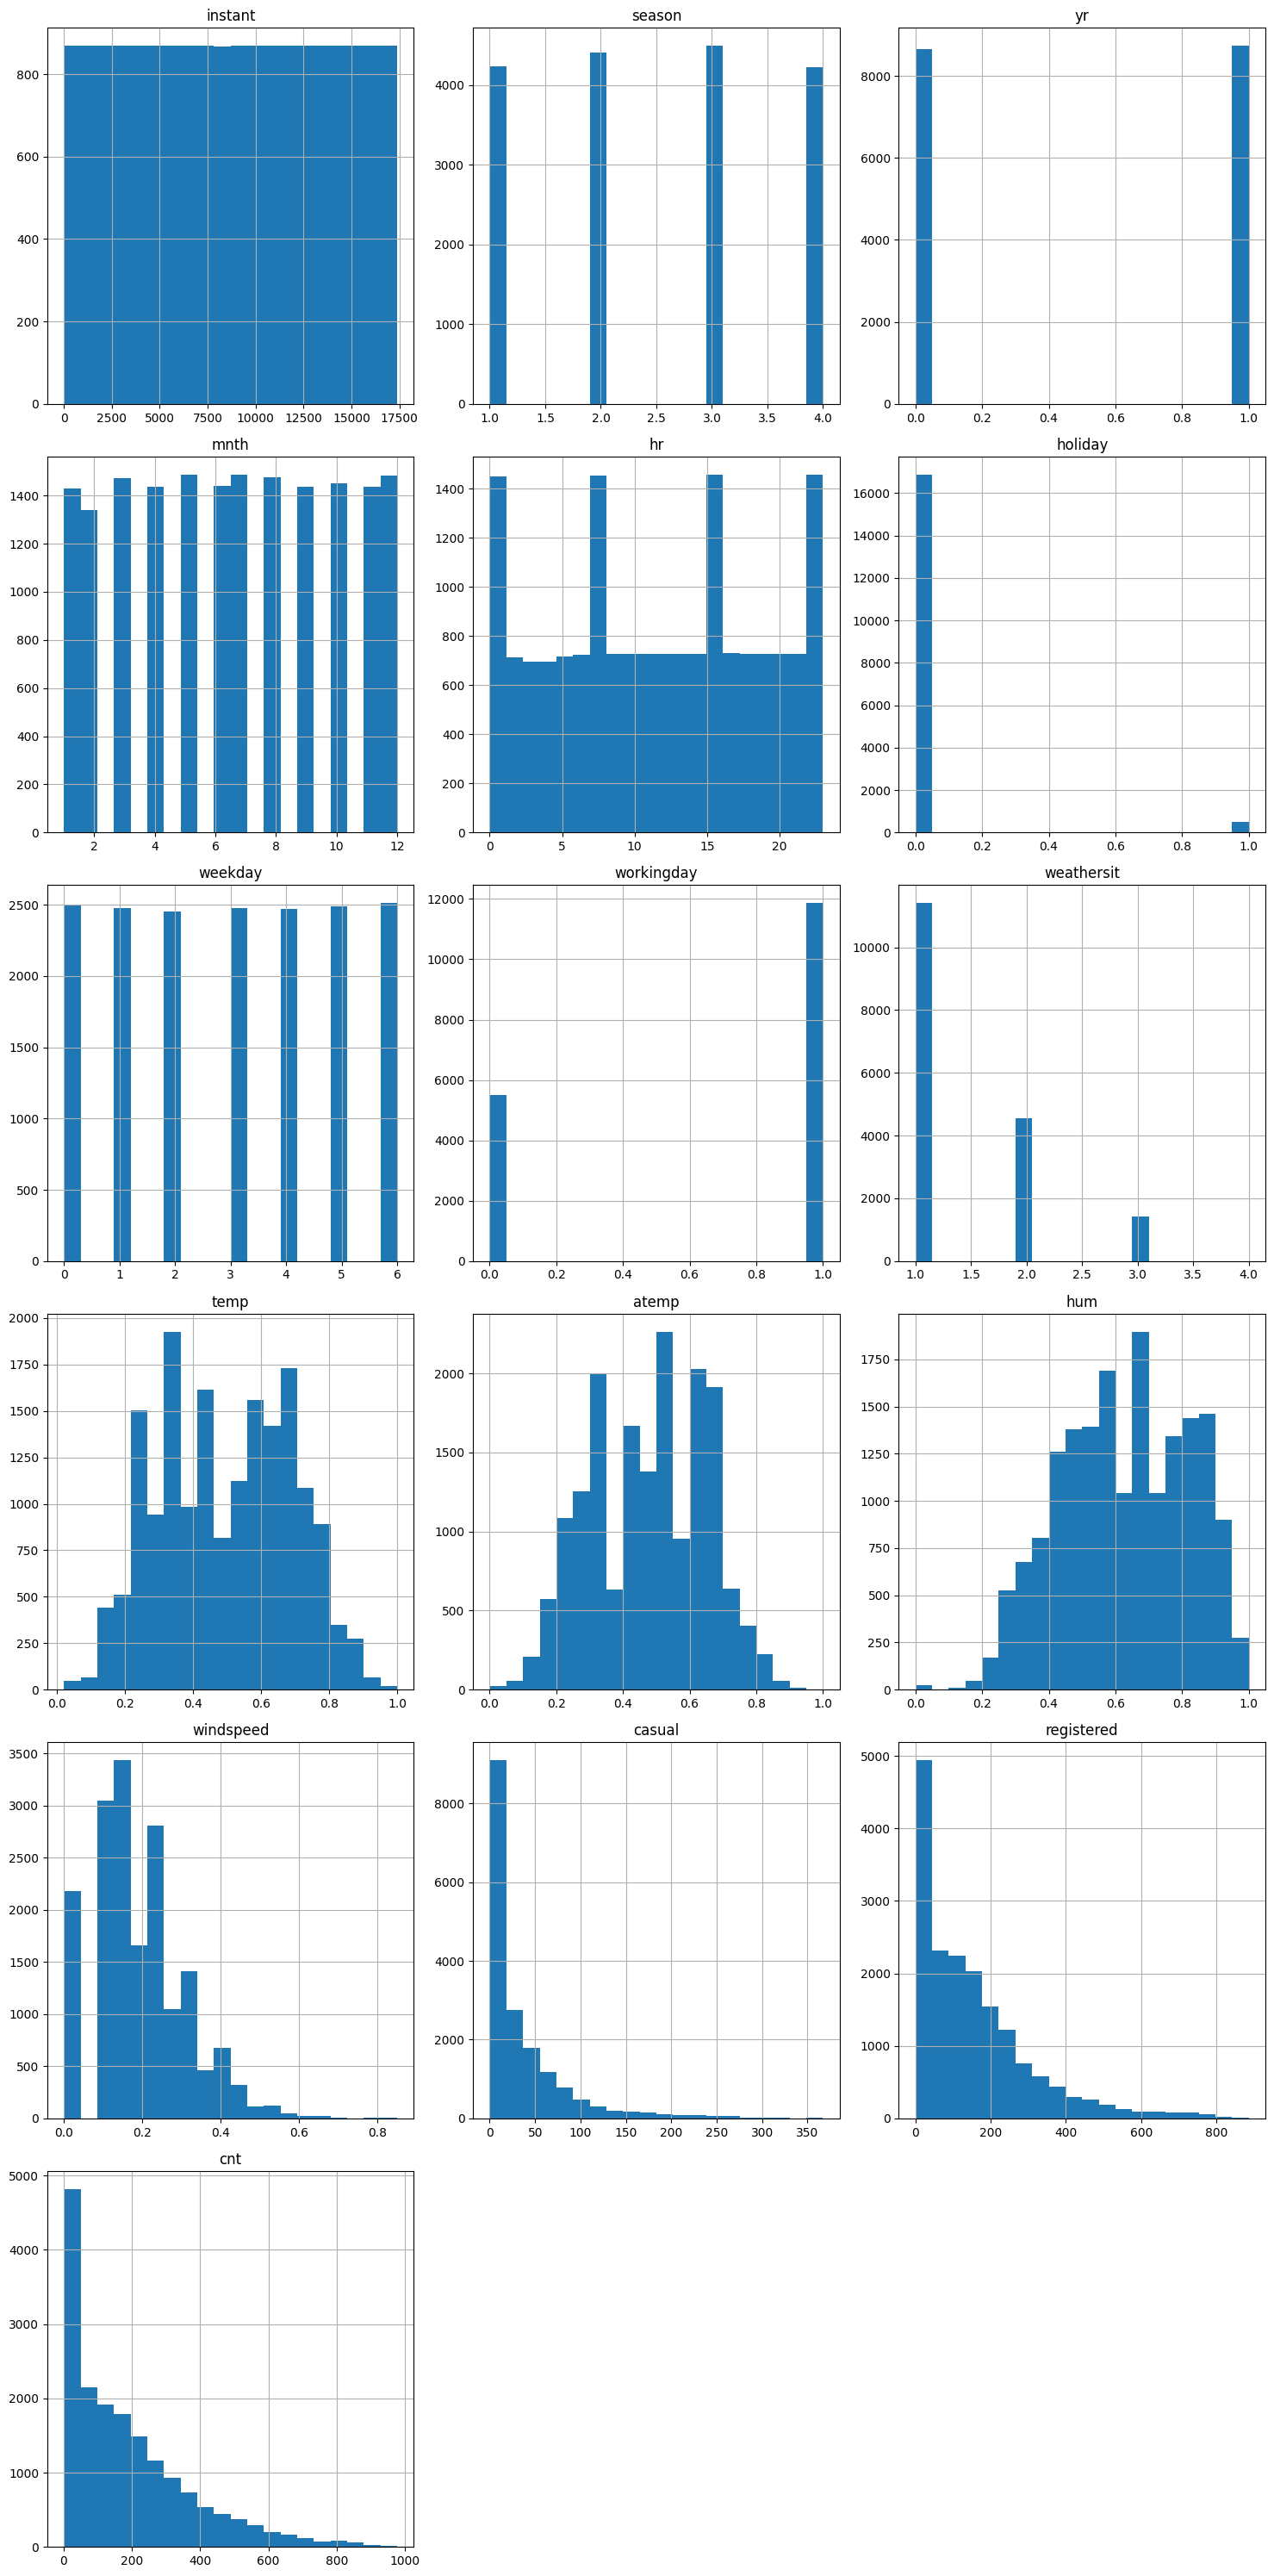

In [72]:
visualize_histograms(df_hour)

Perhatikan pada kolom 'hour' kita melihat bahwa pada jam-jam tertentu, frekuensinya lebih tinggi. Kembali ke dua kemungkinan yang disebut sebelumnya <br>
(1) Datanya hilang: tidak masalah karena selisih nilainya (17544 - 17379 = 165) tidak akan terlalu merubah bentuk distribusi, jam-jam dengan frekuensi tinggi akan tetap menunjukkan dominasi <br>
(2) Sistem hanya melaporkan waktu-waktu yang memilki pengguna: data sudah benar dan tidak ada masalah

In [78]:
# dengan outlier
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [79]:
# tanpa outlier
df_hour_no_out.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14799.000000,14799,14799.000000,14799.000000,14799.000000,14799.000000,14799.0,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000,14799.000000
unique,NaN,709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8429.853639,NaN,2.489898,0.474965,6.511318,11.165890,0.0,3.024191,0.734847,1.444354,0.483410,0.464407,0.644950,0.180161,23.769647,125.060342,148.829989
std,5021.788339,NaN,1.119989,0.499390,3.496449,7.152273,0.0,1.953634,0.441430,0.647801,0.190873,0.170517,0.188672,0.111812,26.523112,113.946827,131.380486
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4096.500000,NaN,1.000000,0.000000,3.000000,5.000000,0.0,1.000000,0.000000,1.000000,0.320000,0.318200,0.500000,0.104500,3.000000,28.000000,33.000000
50%,8245.000000,NaN,2.000000,0.000000,7.000000,11.000000,0.0,3.000000,1.000000,1.000000,0.480000,0.469700,0.650000,0.164200,13.000000,100.000000,120.000000
75%,12743.500000,NaN,3.000000,1.000000,10.000000,18.000000,0.0,5.000000,1.000000,2.000000,0.640000,0.606100,0.810000,0.253700,37.000000,186.000000,229.000000


### Explore Outliers

Walaupun tadi kita sudah menciptakan dataframe versi tanpa outlier demi kebersihan data, sebenarnya outlier masih berguna untuk tujuan _exploratory_. Outlier bersifat ekstrim dan "unik" sehingga disini kita akan mencoba melihat apakah ada fenomena yang menarik yang ditandai dengan adanya outlier ataukah outlier disini hanya gejala dari error pada dataset.

In [63]:
def visualize_outliers(df, title=''):
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    # create grid based on number of columns to visualize
    num_plots = len(numeric_columns)
    num_rows = 6
    num_cols = 3
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 24))
    fig.suptitle(title, fontsize=16)

    for i, column in enumerate(numeric_columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col]
        ax.boxplot(df[column].values)
        ax.set_title(column)
        ax.set_xticks([])
        plt.tight_layout()

    # hide empty charts
    for i in range(num_plots, num_rows*num_cols):
        row = i // num_cols
        col = i % num_cols
        fig.delaxes(axes[row, col])

    plt.show()


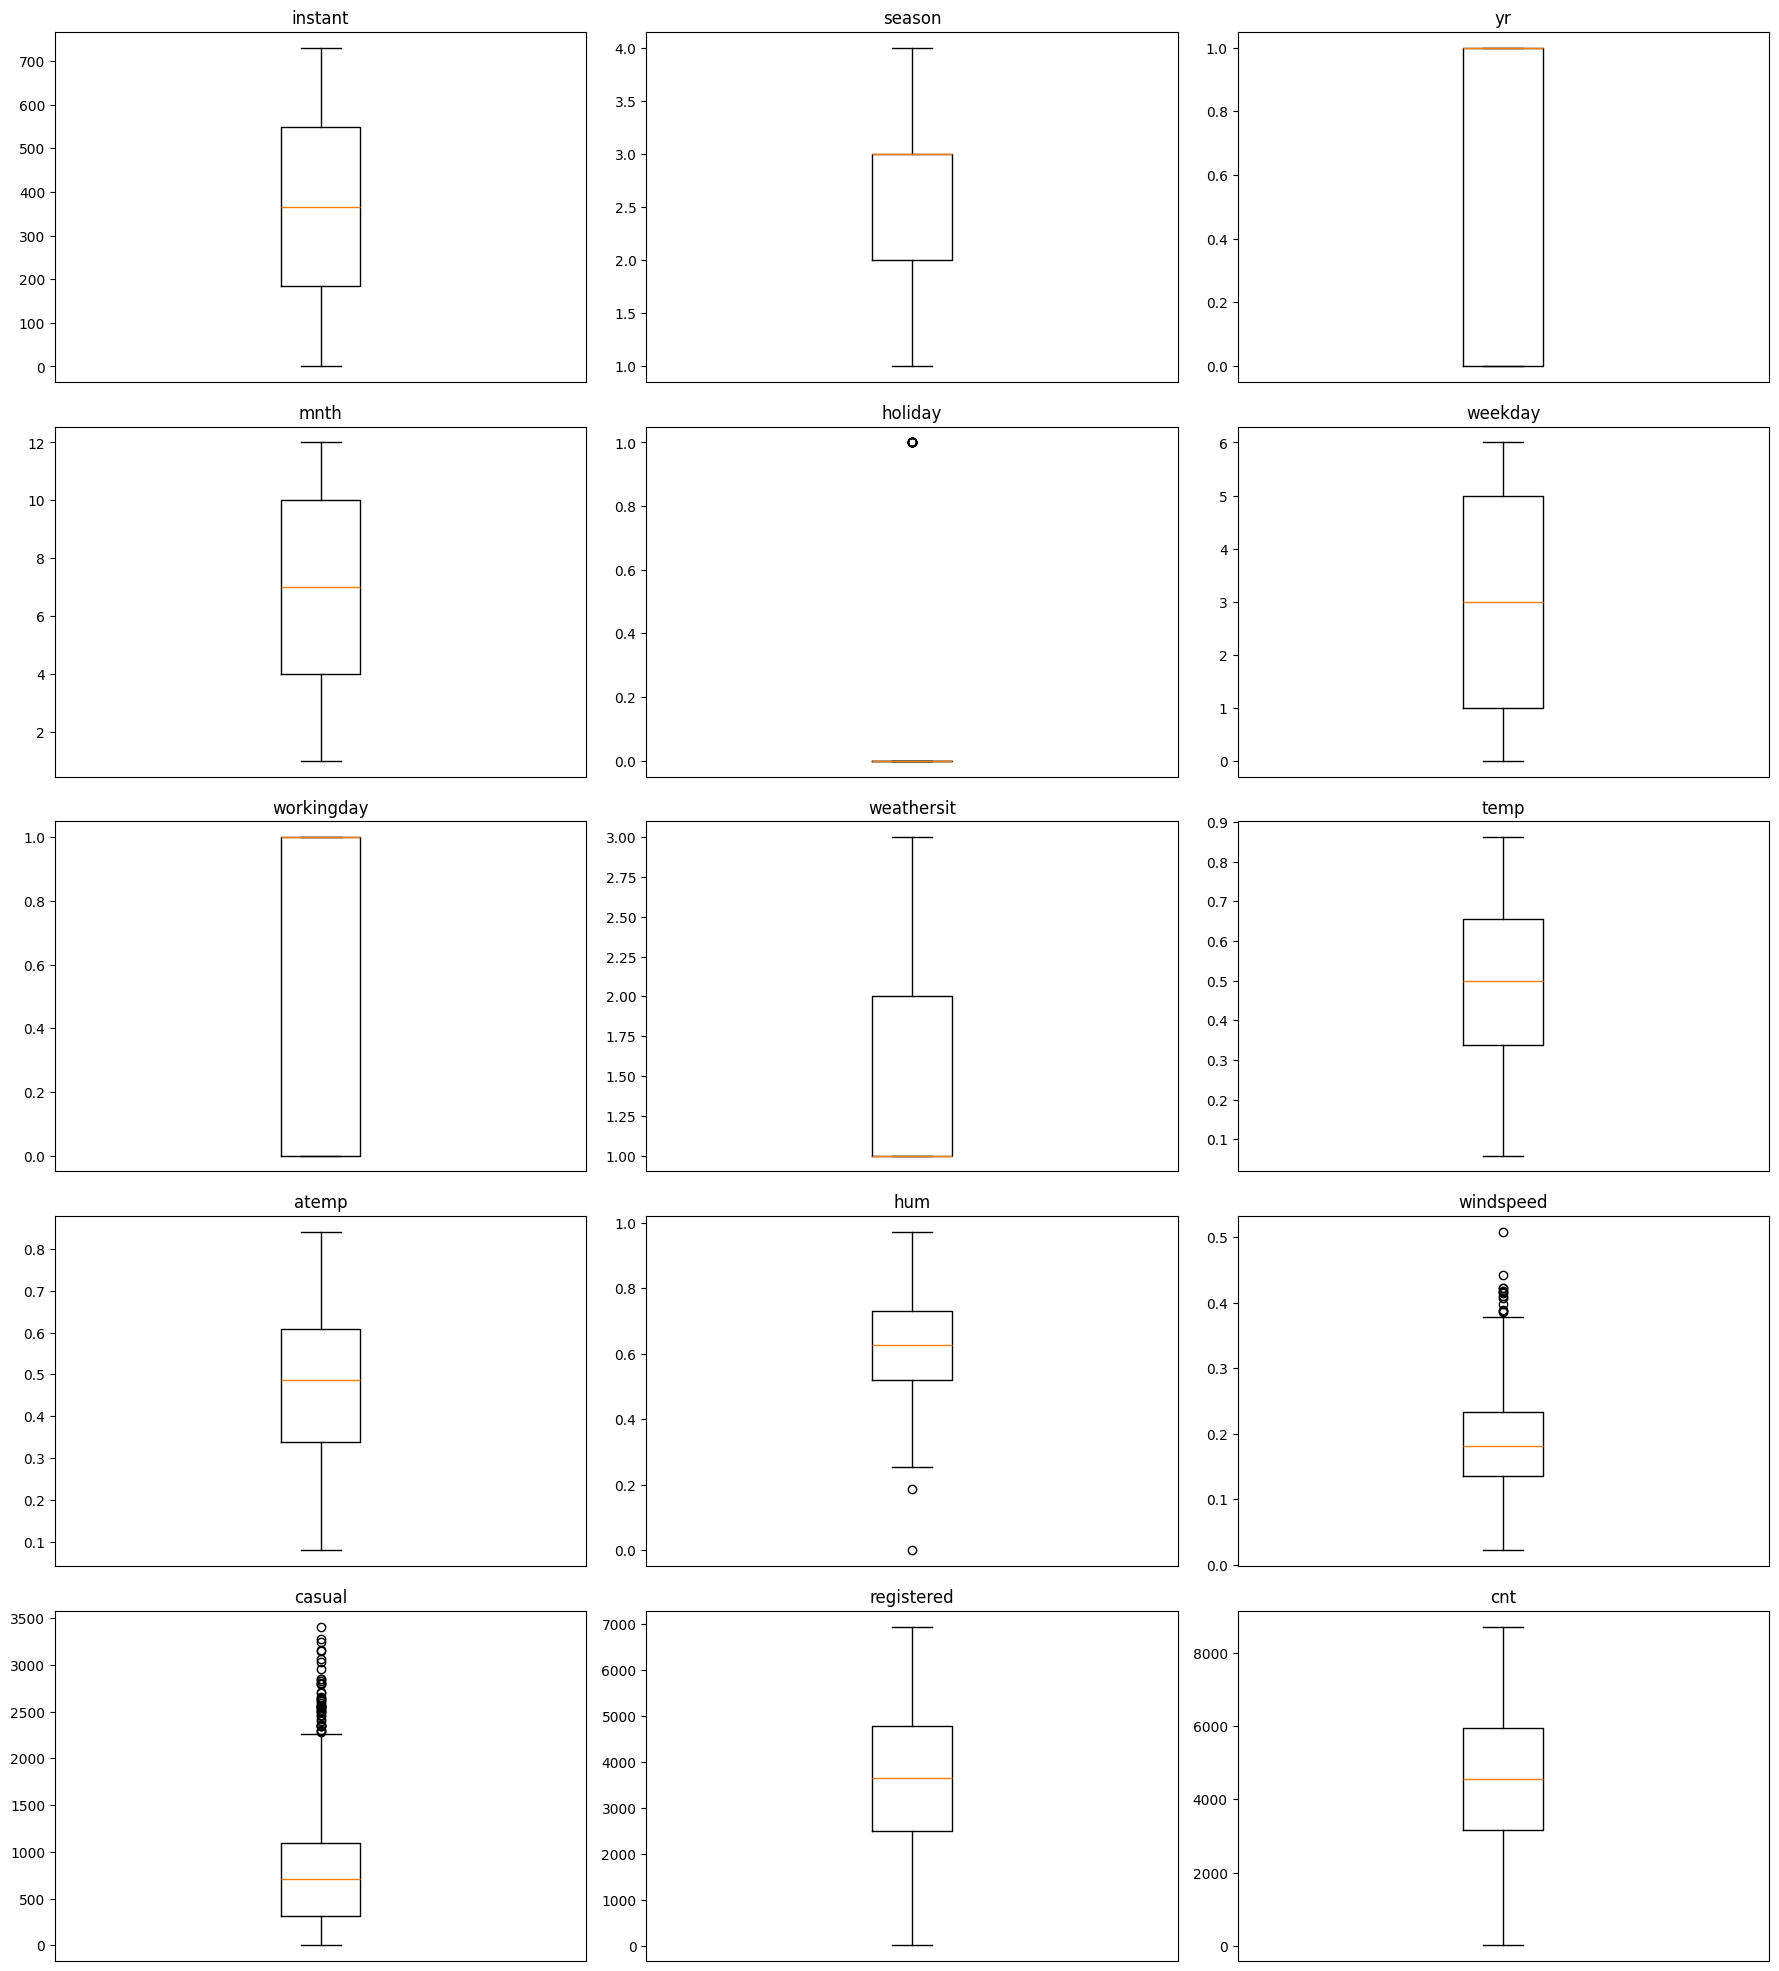

In [65]:
visualize_outliers(df_day, 'Data per Hari')

Didapati bahwa ada beberapa kolom numerik dengan outlier pada `df_day` sebagai berikut
- holiday: outlier pada kolom ini sebenarnya tidak aneh karena memang lebih banyak hari keja (0) daripada hari libur (1) jadi bisa diabaikan
- hum: ada beberapa hari dimana kelembapan lebih jauh lebih rendah dari biasanya
- windspeed: ada beberapa hari dimana kecepatan angin jauh lebih tinggi dari biasanya
- casual: ada beberapa hari dimana jumlah pengguna kasual lebih tinggi dari biasanya

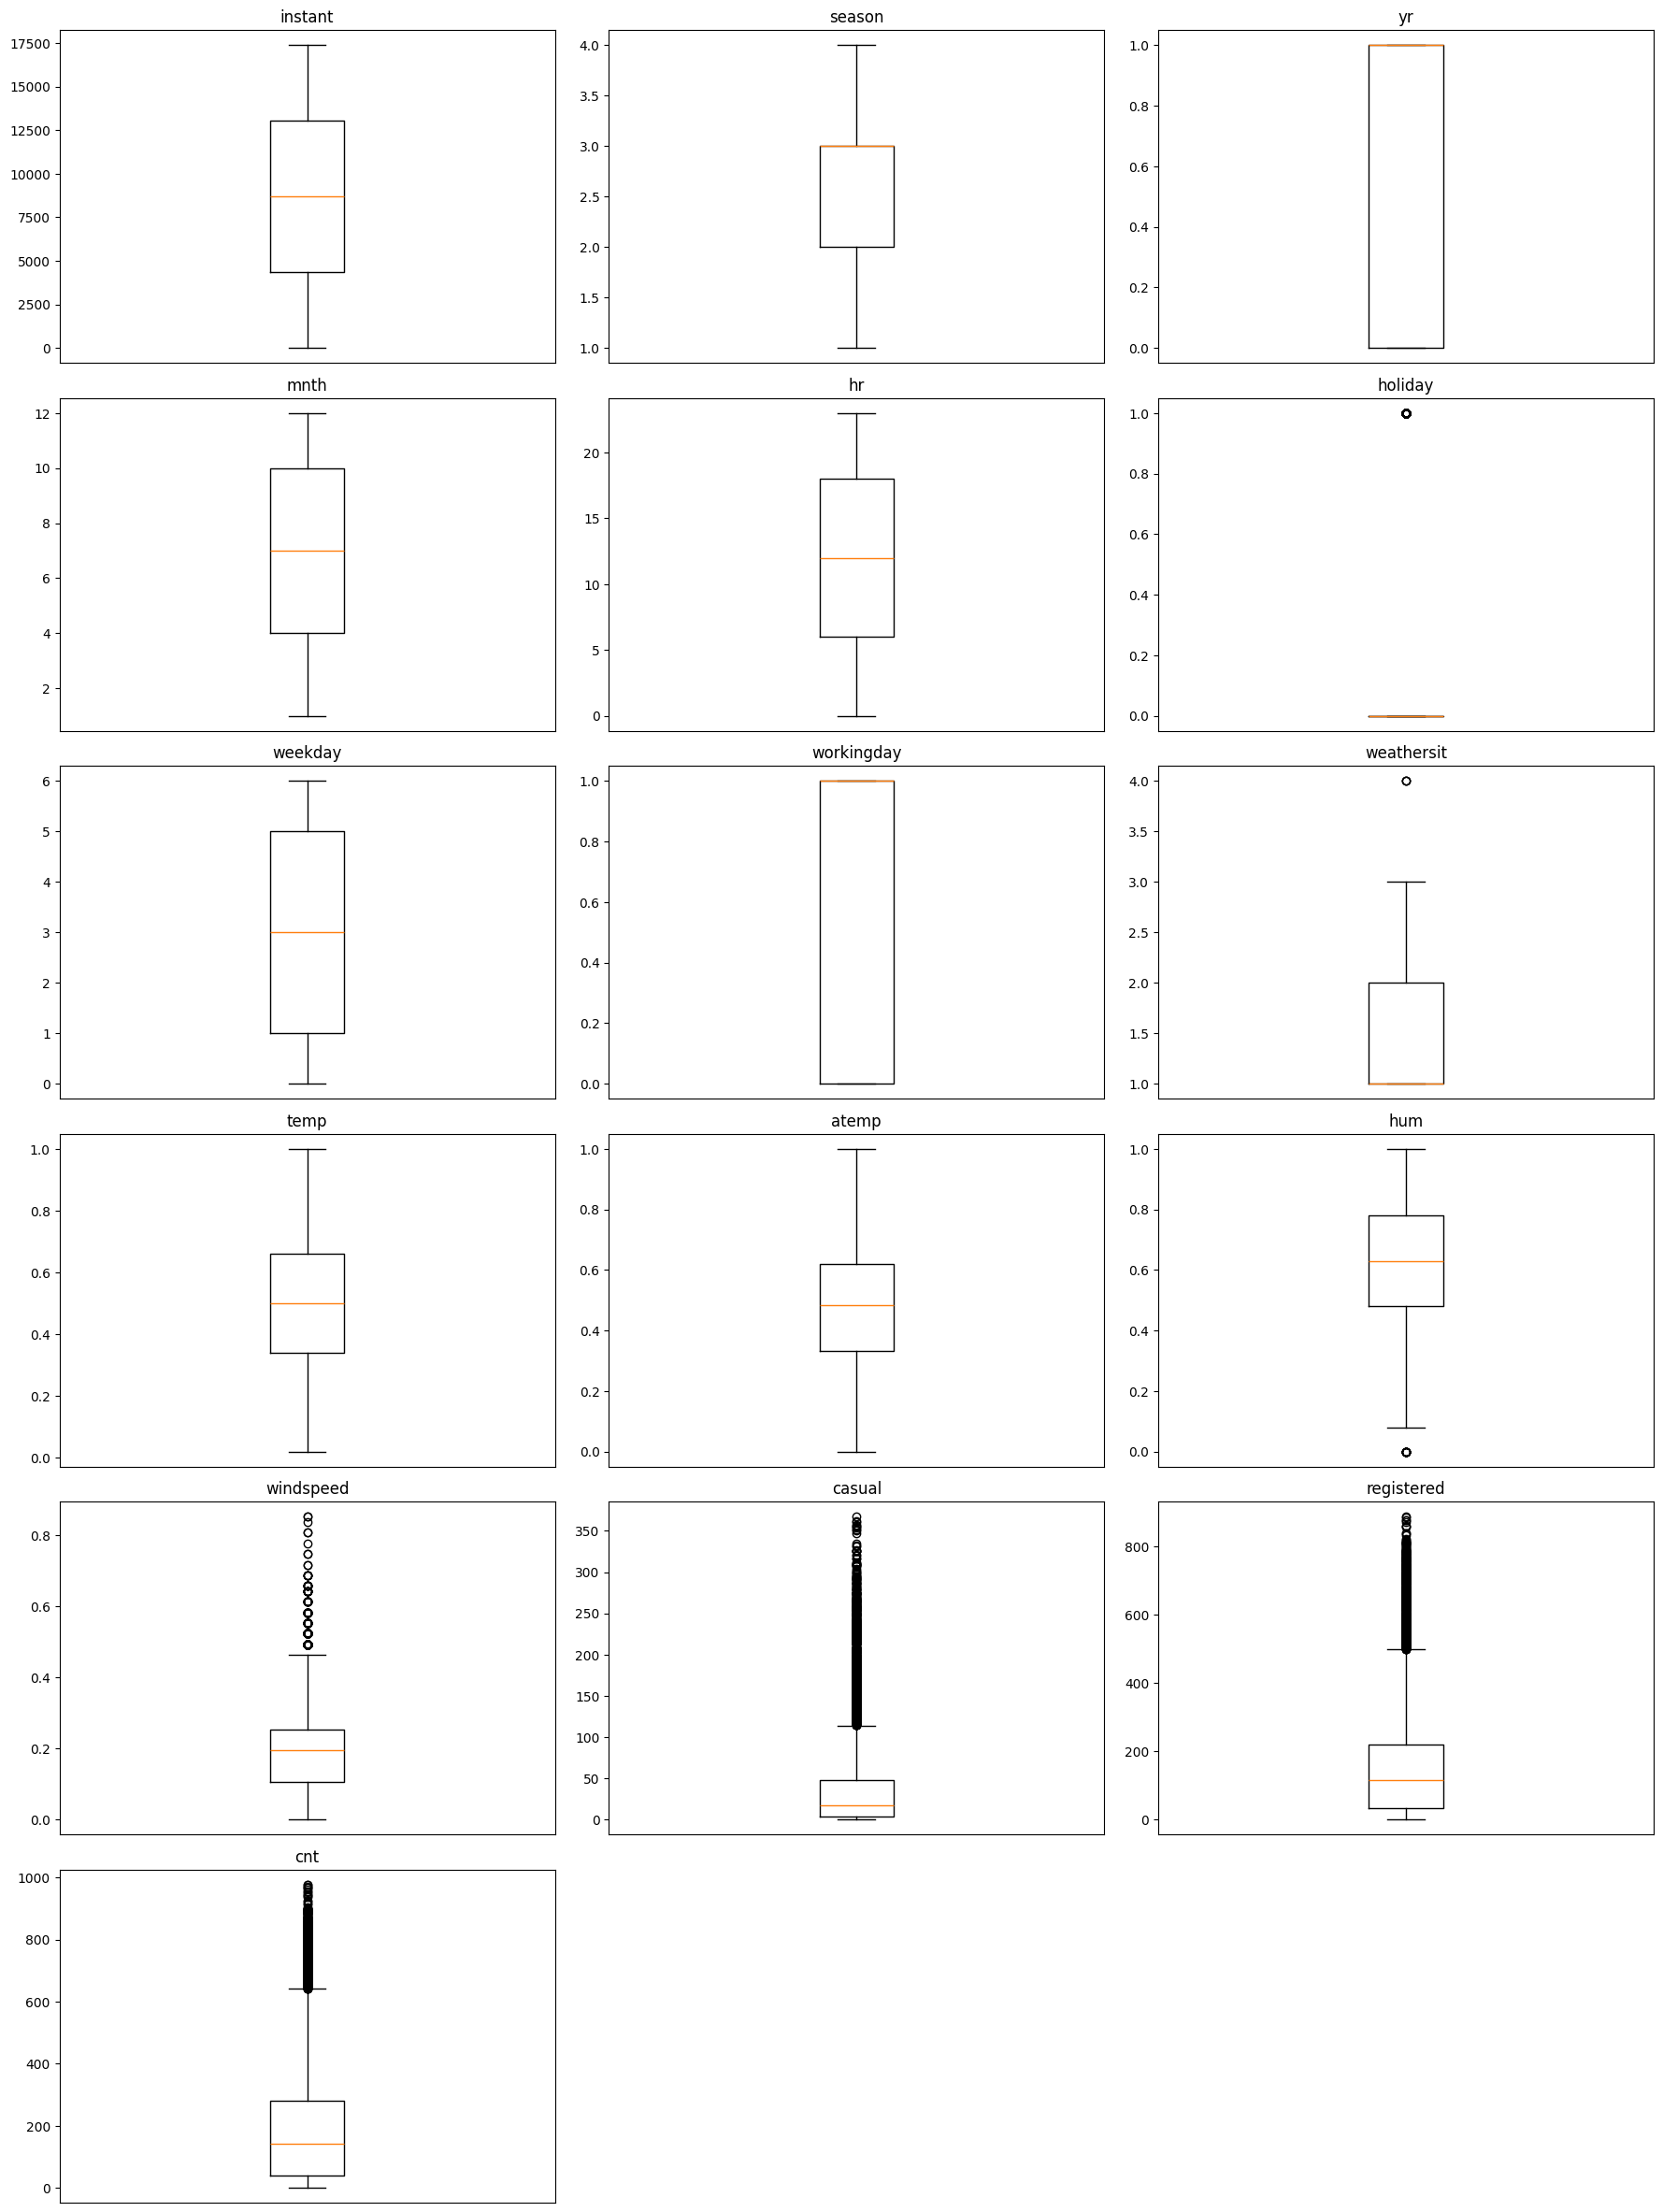

In [66]:
visualize_outliers(df_hour, 'Data per Jam')

Terdapat lebih banyak kolom dengan outlier pada `df_hour` daripada `df_day`, kemungkinan besar karena `df_hour` berisikan info per jam yang lebih detail dan dapat hilang tergeneralisasi saat diagregasi per harinya. Berikut adalah kolom-kolom pada `df_hour` yang memiliki outlier:
- holiday: outlier pada kolom ini sebenarnya tidak aneh karena memang lebih banyak hari keja (0) daripada hari libur (1) jadi bisa diabaikan
- weathersit: ada beberapa jam dimana kondisi cuaca lebih ekstrem dari biasanya
- hum: ada beberapa jam dimana kelembapan lebih jauh lebih rendah dari biasanya
- windspeed: ada beberapa jam dimana kecepatan angin jauh lebih tinggi dari biasanya
- casual: ada beberapa jam dimana jumlah pengguna kasual lebih tinggi dari biasanya
- registered:  ada beberapa jam dimana jumlah pengguna terdaftar lebih tinggi dari biasanya
- cnt:  ada beberapa jam dimana jumlah pengguna total lebih tinggi dari biasanya

> Ada beberapa fenomena terkait metrik cuaca (kondisi, kelembapan, kecepatan angin) dan jumlah pengguna (kasual atau terdaftar) yang cukup _note-worthy_

### Explore Correlation

Untuk korelasi, kita akan menggunakan data tanpa outlier sehingga mendapatkan pola yang lebih umum dan tidak _overfit_ terhadap outlier

In [86]:
def pearson_heatmap(df, title=''):
    numeric_df = df.select_dtypes(include=['number'])
    corr = numeric_df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
    plt.title('Korelasi Pearson - {}'.format(title)) 
    plt.show()

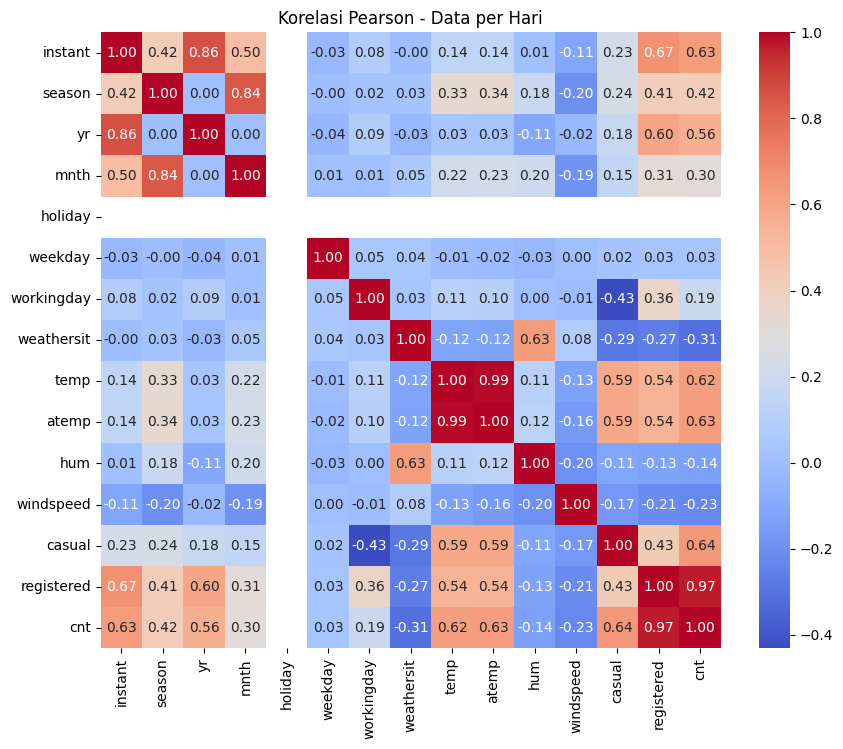

In [87]:
pearson_heatmap(df_day_no_out, 'Data per Hari')

Dari matriks korelasi di atas, terdapat korelasi positif moderat antara suhu dan jumlah penyewa (baik casual maupun registered)

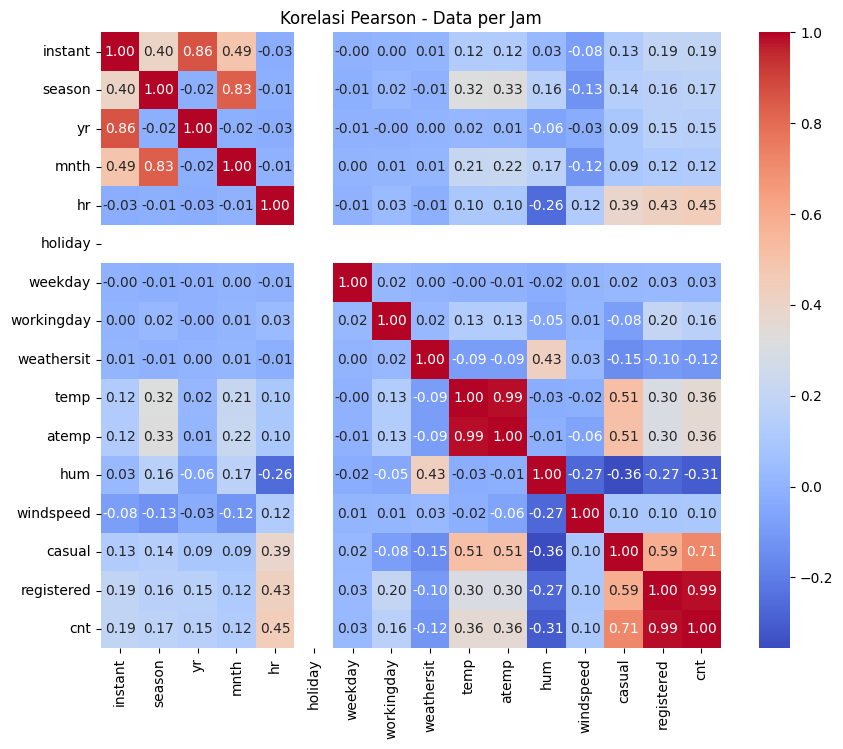

In [89]:
pearson_heatmap(df_hour_no_out, 'Data per Jam')

Korelasi antara suhu dan jumlah penyewa yang terdaftar (registered) menurun, tetapi untuk penyewa kasual tidak terlalu menurun.

> Dari beberapa EDA di atas, didapati dua hal yang dirasa cukup menarik dan ingin dikulik lebih lanjut, yaitu cuaca dan jam per hari. Oleh karena itu, diformulasikan pertanyaan bisnis sebagai berikut:
> - Bagaimana perubahan musim memengaruhi volume penyewaan sepeda? (anggapannya cuaca akan berubah sesuai musim)
> - Kapan waktu puncak untuk penyewaan sepeda pada hari kerja dibandingkan dengan akhir pekan?

## Visualization & Explanatory Analysis

Pada bagian ini kita akan menggunakan data tanpa outliers karena pertanyaan yang ingin dijawab lebih relevan dengan pola yang umum, bukan kasus khusus seperti outlier.

### Pertanyaan 1: Bagaimana perubahan musim memengaruhi volume penyewaan sepeda?

Untuk menjawab pertanyaan pertama, kita akan mengelompokkan data harian berdasarkan musim lalu melihat jumlah rata-rata penyewaannya.

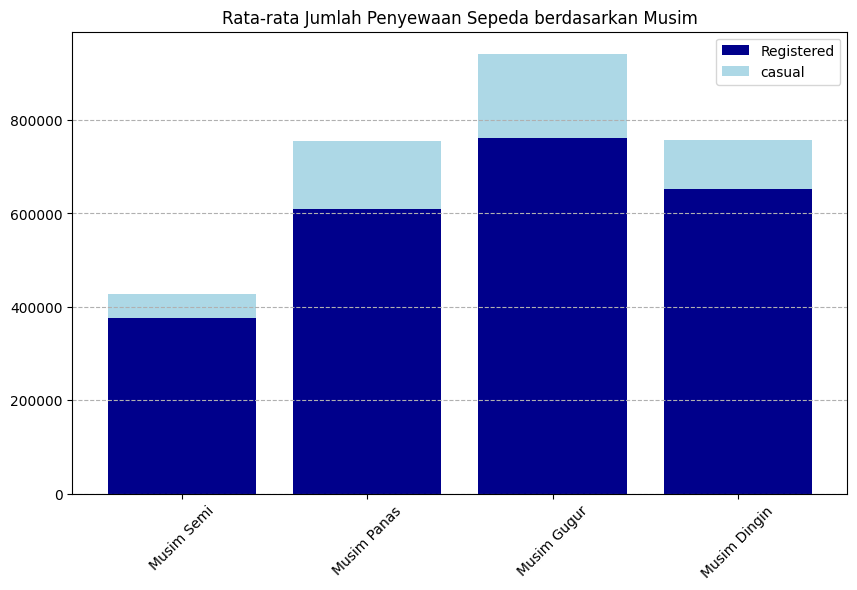

In [110]:
# mapping seasons for better readability
seasons_mapping = {1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'}

# aggregate data for each season
seasonal_users = df_day_no_out.groupby('season')[['casual', 'registered']].sum().reset_index()
seasonal_users['season_name'] = seasonal_users['season'].map(seasons_mapping)

plt.figure(figsize=(10, 6))
plt.bar(seasonal_users['season_name'], seasonal_users['registered'], label='Registered', color='darkblue')
plt.bar(seasonal_users['season_name'], seasonal_users['casual'], bottom=seasonal_users['registered'], label='casual', color='lightblue')
plt.title('Rata-rata Jumlah Penyewaan Sepeda berdasarkan Musim')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()


Dari musim semi ke musim panas, terdapat kenaikan yang signifikan dalam jumlah rata-rata penyewa. Pada musim semi, jumlah rata-rata penyewa sekitar 400.000 sedangkan pada musim panas naik hampir dua kali lipat menjadi sekitar 700.000. Hal ini juga masuk akal jika dikaitkan dengan hasil uji korelasi pada EDA sebelumnya, dimana suhu mempunyai korelasi positif moderat dengan jumlah penyewa. Tetapi, jumlah penyewa paling memuncak di musim gugur. Cuaca musim gugur lebih teduh dari musim panas, tetapi belum sedingin musim dingin. 

> Strategi apa yang dapat kita terapkan untuk menjaga/meningkatkan keterlibatan pengguna sepanjang tahun?

1. Adaptasi terhadap cuaca
- **Menyertakan aksesoris tambahan**: Selain sewa sepeda, tawarkan pula aksesoris yang dapat membantu penyewa melawan kondisi cuaca yang di luar kendali mereka. Contohnya, menyewakan jas hujan pada pos tempat pengembalian sepeda.
- **Tambahkan fitur cuaca langsung di aplikasi**: Tingkatkan pengalaman penyewa dengan menambahkan fitur berita cuaca dan sistem _routing_ yang merekomendasikan rute terbaik yang sesuai.

2. Perbaikan infrastruktur
- **Bekerjasama dengan pemerintah**: Perbaikan infrastruktur adalah investasi yang baik agar penyewa merasa aman untuk mengendarai sepeda sepanjang tahun. 

3. Menjalin _partnership_
- **Diskon pegawai**: Tawarkan diskon untuk kantor/bisnis sekitar agar pegawai terdorong untuk menggunakan sepeda untuk, misalnya, mencari makan siang atau bahkan pulang-pergi.
- **Paket turis**: Berkolaborasi dengan _tourism boards_ lokal untuk membuat tawaran spesial bagi turis yang berkunjung.

### Pertanyaan 2: Kapan waktu puncak untuk penyewaan sepeda pada hari kerja dibandingkan dengan akhir pekan?


Untuk menjawab pertanyaan kedua, kita bisa melihat perbedaan tren per jam hari kerja dibandingkan dengan akhir pekan menggunakan line chart.

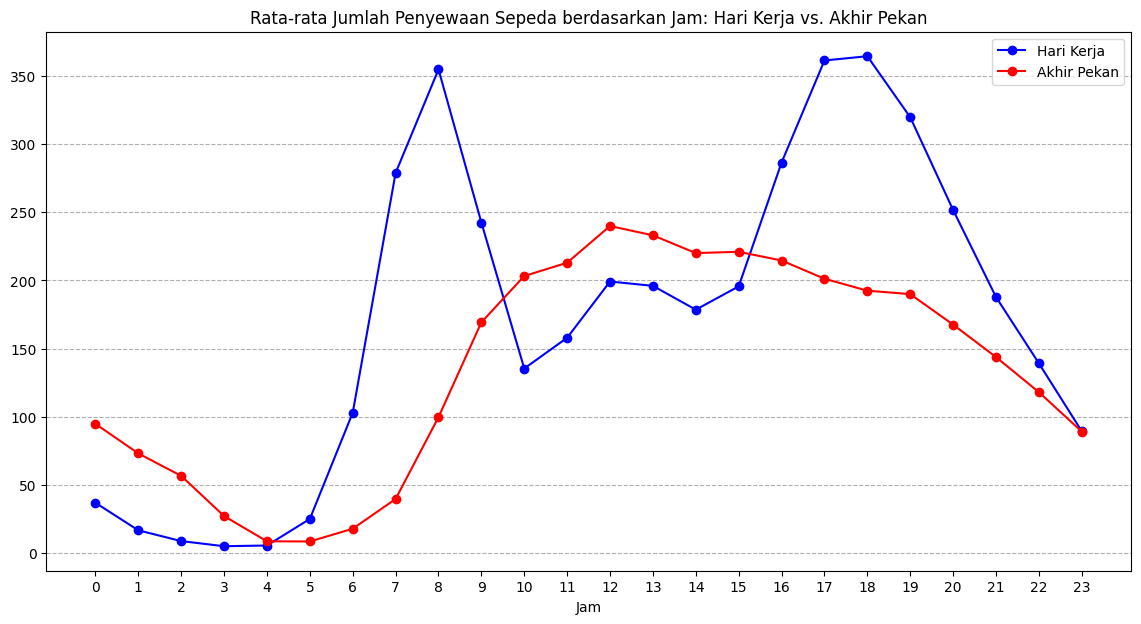

In [113]:
# categorize into weekday and weekend
df_hour_no_out['day_type'] = df_hour_no_out['weekday'].apply(lambda x: 0 if x in [1, 2, 3, 4, 5] else 1)

# aggregate data by hour
hourly_agg = df_hour_no_out.groupby(['day_type', 'hr'])['cnt'].mean().unstack(0)

plt.figure(figsize=(14, 7))
plt.plot(hourly_agg.index, hourly_agg[0], label='Hari Kerja', color='blue', marker='o')
plt.plot(hourly_agg.index, hourly_agg[1], label='Akhir Pekan', color='red', marker='o')
plt.title('Rata-rata Jumlah Penyewaan Sepeda berdasarkan Jam: Hari Kerja vs. Akhir Pekan')
plt.xlabel('Jam')
plt.xticks(hourly_agg.index)
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.show()


Didapati bahwa pada hari kerja, jam dengan paling banyak penyewaan adalah sekitar pukul 08.00 dan pukul 17.00-18.00 sedangkan pada akhir pekan adalah sekitar pukul 12.00

> Kita dapat lanjut dengan melakukan analisis kluster terhadap grafik di atas. Dari jam-jam yang banyak penyewa, kita dapat memprediksi tipe-tipe penyewa sepeda seperti berikut:

1. Penyewa _Commuting_ : Puncak jumlah penyewa pada hari kerja pukul 08.00 dan 17.00-18.00 ada di angka yang mirip. Kita dapat berasumsi bahwa ini adalah kelompok penyewa yang menggunakan sepeda untuk pulang-pergi dari tempat kerja
2. Penyewa Jam Makan Siang: Selain para _commuters_, ada sedikit kenaikan penyewa di hari kerja di dekat pukul 12.00. Ini biasanya adalah jam makan siang, kemungkinan besar ini adalah penyewa yang menggunakan sepeda untuk mencari makan siang di tempat yang sedikit jauh atau hanya ingin jalan-jalan pada jam istirahat mereka.
3. Penyewa Santai: Pada akhir pekan, hanya terdapat satu puncak yaitu di sekitar pukul 12.00. Biasanya, orang-orang mulai keluar dari rumah untuk bersantai atau jalan-jalan di sekitar jam ini.


> Bagaimana kita dapat menyesuaikan ketersediaan sepeda untuk memenuhi permintaan selama waktu-waktu tersebut?

- **Alokasi dinamis**: sesuaikan jumlah sepeda di pos peminjaman dengan jumlah permintaan pada jam tertentu. Misal, menambah jumlah sepeda dekat perkantoran selama jam sibuk.
- **Kerjasama antar pengguna**: tawarkan insentif (cth: poin bonus) kepada pengguna untuk mengembalikan sepeda ke stasiun sekitar yang membutuhkan lebih banyak sepeda.
- **Sesuaikan harga**: ratakan permintaan sepanjang hari dengan menurunkan harga pada jam-jam senggang.

## Conclusion

- Penyewa paling banyak di musim gugur karena cuaca dan suhu paling mendukung untuk bersepeda. Agar jumlah pengguna lebih stabil sepanjang tahun, kita bisa menambahkan jasa dan produk tambahan yang membatu keamanan dan kenyamanan pengguna tidak terlalu terpengaruh oleh perubahan musim.
- Terdapat 3 tipe alasan utama untuk menyewa sepeda: _commuting_, mencari makan siang, dan bersantai. Sesuaikan alokasi sepeda dan harga sewa dengan jam masing-masing kluster untuk meratakan _demand_.